# Objetivo do projeto
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

## Abrir o arquivo e estudar as informações gerais

In [2]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [3]:
# Ler o arquivo
df = pd.read_csv('/datasets/games.csv')
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4869,NASCAR Heat,PS,2000.0,Racing,0.22,0.15,0.00,0.03,62.0,tbd,E
12486,Cold Fear,XB,2005.0,Action,0.05,0.01,0.00,0.00,71.0,7.6,M
5125,The Legend of Spyro: A New Beginning,DS,2006.0,Platform,0.33,0.01,0.00,0.03,68.0,6.8,E
1755,LEGO Star Wars: The Video Game,XB,2005.0,Action,0.83,0.28,0.00,0.05,NaN,NaN,NaN
16031,Minna to Issho,PSV,2011.0,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [4]:
# Verificar as informações
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


## Preparar os dados

In [5]:
# Deixar em minúsculo o nome das colunas
df.columns = df.columns.str.lower()

- Valores nulos foram deixados como nan para não afetar as análises.

In [10]:
# Converter os tipos de dados
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None


- Na coluna "year_of_release" os dados estavam como float e foram alterados para int para melhor visualização e análise.
- Na coluna "user_score" os dados foram convertidos para float e valores como "TBD" foram convertidos para nulos para podermos usar os números na análise.

## Analisar os dados

### Jogos lançados a cada ano

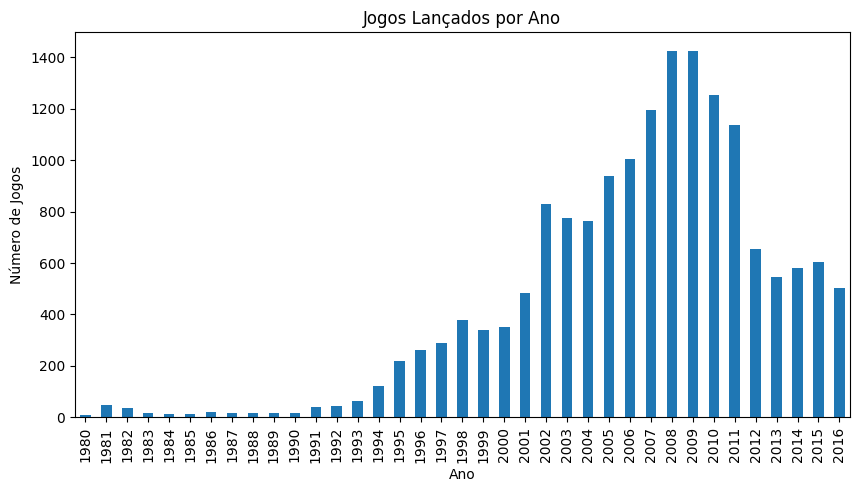

In [11]:
games_per_year = df['year_of_release'].value_counts().sort_index()

# Plotar o gráfico de barras de jogos por ano
games_per_year.plot(kind='bar', figsize=(10, 5))
plt.title('Jogos Lançados por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos')

plt.show()

- Os laçamentos começaram a crescer significamente a partir de 1994, com seu pico no final da década de 2010, com uma  queda e uma estabilização nos anos seguintes até o presente.

### Como as vendas variam de plataforma para plataforma

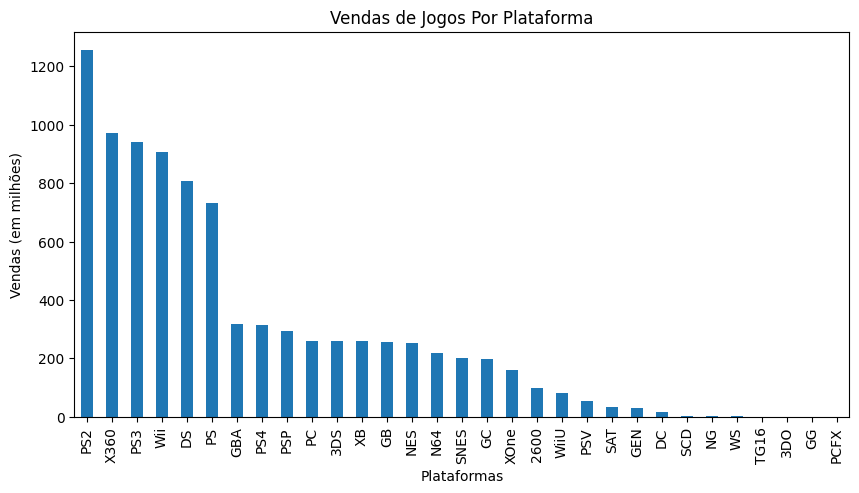

In [12]:
# Criar uma coluna com as vendas totais
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

#Plotar o gráfico de vendas por plataforma
top_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_sales.plot(kind='bar', figsize=(10, 5))
plt.title('Vendas de Jogos Por Plataforma')
plt.xlabel('Plataformas')
plt.ylabel('Vendas (em milhões)')

plt.show()

### Evolução das plataformas ao longo  dos anos

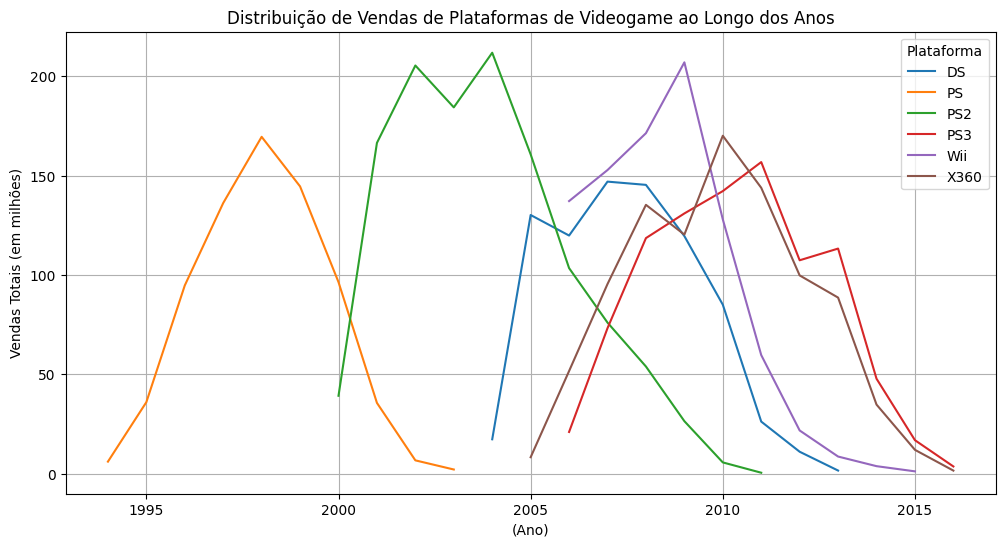

In [13]:
# Filtrar e agrupar os dados para a análise
top_filter = df[df['platform'].isin(top_sales.head(6).index)]
sales = top_filter.groupby(['platform','year_of_release'])['total_sales'].sum()
sales = sales.reset_index()
sales = sales[sales['total_sales'] > 0.2]

# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(12, 6))

# Loop para plotar os dados de cada plataforma
for plataforma in sales['platform'].unique():
    dados_plataforma = sales[sales['platform'] == plataforma]
    plt.plot(dados_plataforma['year_of_release'], dados_plataforma['total_sales'], label=plataforma)

# Configurações do gráfico
plt.title('Distribuição de Vendas de Plataformas de Videogame ao Longo dos Anos')
plt.xlabel('(Ano)')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataforma')
plt.grid(True)

plt.show()

- Playsation 1, Plastation 2 e Nintedo DS foram plataformas muito populares em suas épocas mas que agora não tem mais vendas.
- As novas plataformas levam em média 6 anos para aparecerem e as velhas em média 10 anos para desaparecerem.

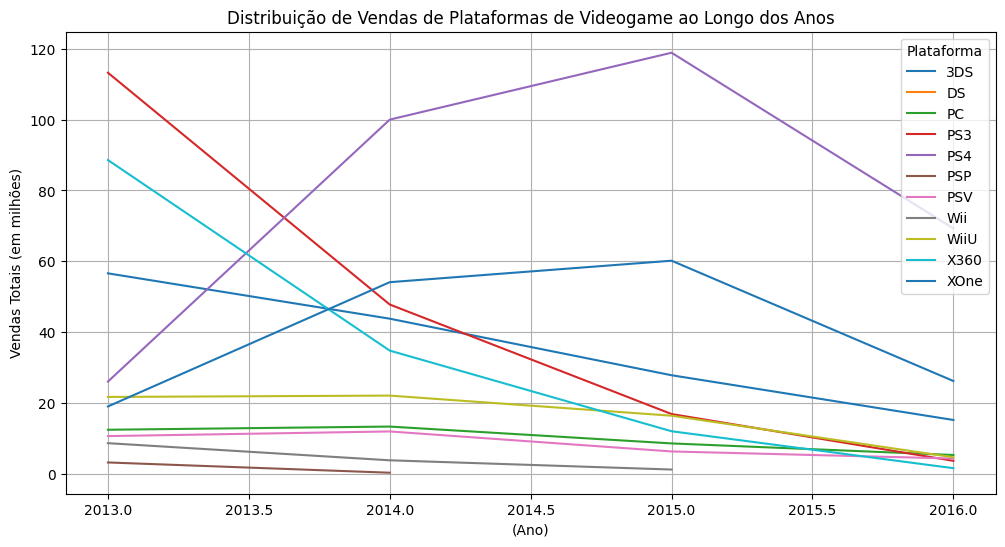

In [14]:
# Filtrar e agrupar os dados para a análise
df_cut = df[df['year_of_release']>=2013]
sales_cut = df_cut.groupby(['platform','year_of_release'])['total_sales'].sum() 
sales_cut = sales_cut.reset_index()
sales_cut = sales_cut[sales_cut['total_sales'] > 0.2]


# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(12, 6))


# Loop para plotar os dados de cada plataforma
for plataforma in sales_cut['platform'].unique():
    dados_plataforma = sales_cut[sales_cut['platform'] == plataforma]
    plt.plot(dados_plataforma['year_of_release'], dados_plataforma['total_sales'], label=plataforma)

# Configurações do gráfico
plt.title('Distribuição de Vendas de Plataformas de Videogame ao Longo dos Anos')
plt.xlabel('(Ano)')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataforma')
plt.grid(True)

plt.show()

- PS4 está liderando em vendas seguido pelo Xbox One, ambos parecem estar em crescimento nos ultimos anos (com leve queda em 2016).
- Outras escolhas potencialmente lucrativas são Nintendo 3DS, PC e WiiU.

### Vendas de jogos de plataforma para plataforma

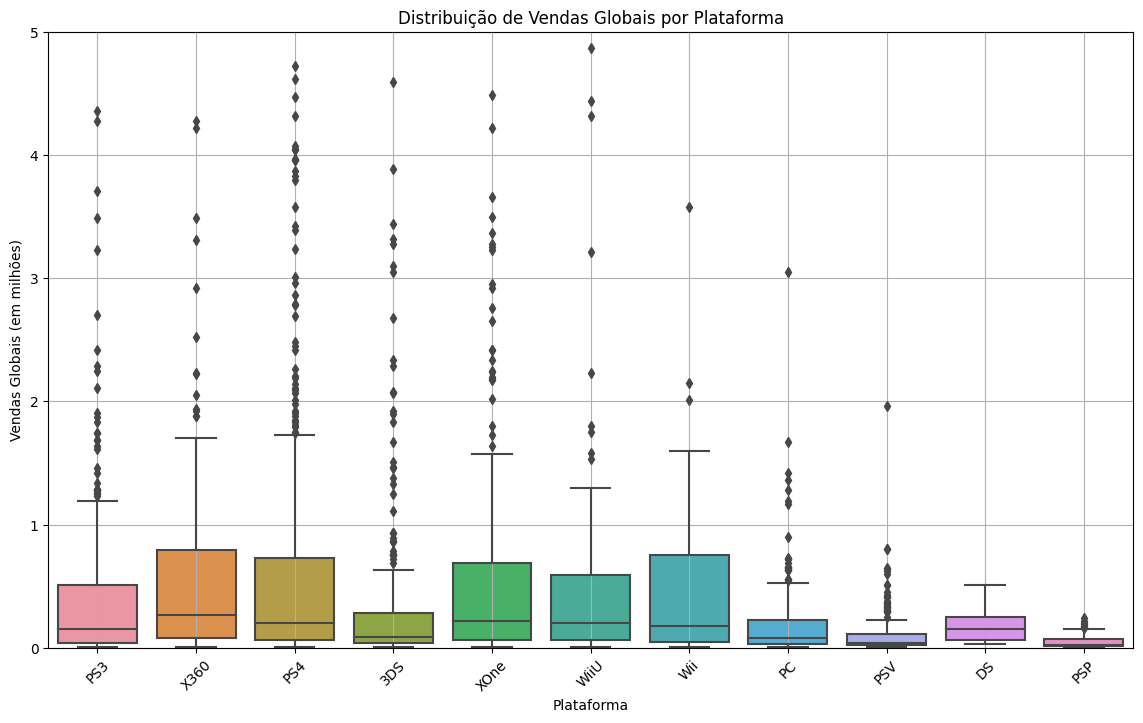

In [15]:
# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(14, 8))

# Plotar o gráfico de caixa das vendas por plataforma
sns.boxplot(data=df_cut, x='platform', y='total_sales')

# Configurações do gráfico
plt.title('Distribuição de Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 5)

plt.show()

- As diferenças são significativas de plataforma para plataforma, variando bastante as distribuições de vendas e as médias também.

### Como as avaliações de usuários e  profissionais afetam as vendas de uma plataforma

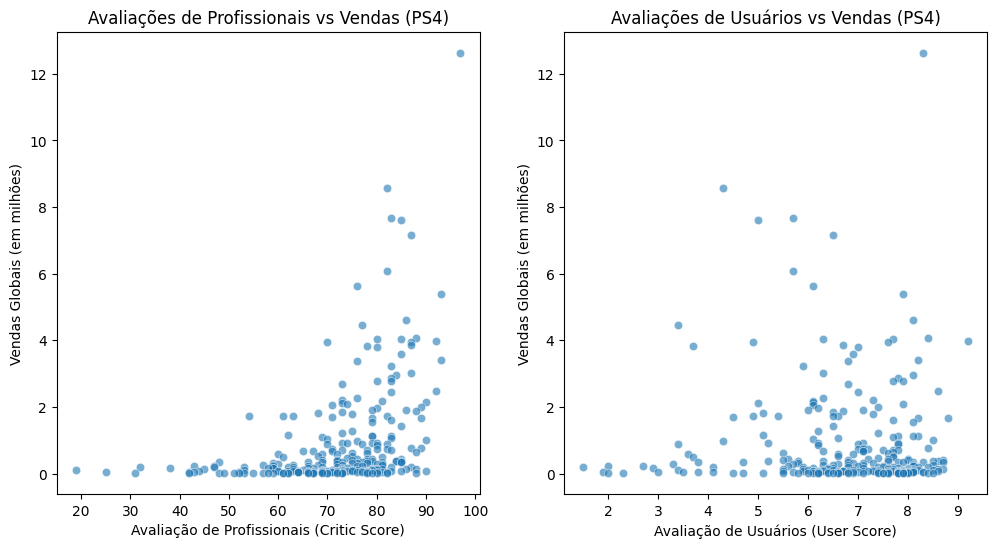

In [17]:
df_ps4 = df_cut[df_cut['platform'] == 'PS4']

# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de dispersão para critic_score vs total_sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales', alpha=0.6)
plt.title('Avaliações de Profissionais vs Vendas (PS4)')
plt.xlabel('Avaliação de Profissionais (Critic Score)')
plt.ylabel('Vendas Globais (em milhões)')

# Gráfico de dispersão para user_score vs total_sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ps4, x='user_score', y='total_sales', alpha=0.6)
plt.title('Avaliações de Usuários vs Vendas (PS4)')
plt.xlabel('Avaliação de Usuários (User Score)')
plt.ylabel('Vendas Globais (em milhões)')

plt.show()

In [18]:
# Calcular a correlação
corr_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])
corr_user = df_ps4['user_score'].corr(df_ps4['total_sales'])

print(f"Correlação entre avaliações de profissionais e vendas: {corr_critic:.2f}")
print(f"Correlação entre avaliações de usuários e vendas: {corr_user:.2f}")

Correlação entre avaliações de profissionais e vendas: 0.41
Correlação entre avaliações de usuários e vendas: -0.03


- Avaliações de profissionais tem uma correlação maior com as vendas do que avaliações de usuários.

### Comparação de vendas dos mesmos jogos em diferentes plataformas

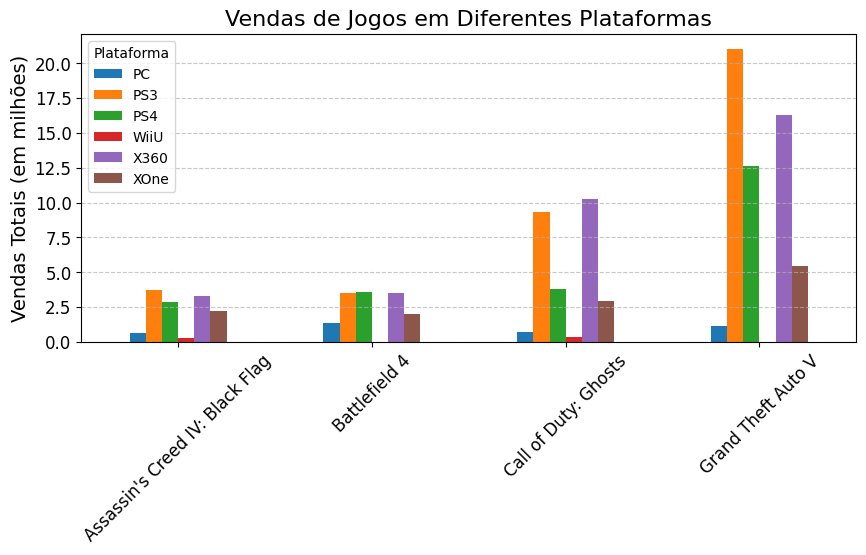

In [22]:
# Filtrar jogos escolhidos para a análise
games = df_cut[df_cut['name'].isin(['Grand Theft Auto V', 'Call of Duty: Ghosts','Battlefield 4', "Assassin's Creed IV: Black Flag"])]

# Puxar as plataformas de cada jogo
platforms = games['platform'].unique()

# Combinar e agrupar os dados
df_multi = games[games['platform'].isin(platforms)]
sales_multi = df_multi.groupby(['name', 'platform'])['total_sales'].sum().unstack()

# Plotar o grafico de barras
sales_multi.plot(kind='bar',figsize=(10,4))
plt.title('Vendas de Jogos em Diferentes Plataformas', fontsize=16)
plt.xlabel('')
plt.ylabel('Vendas Totais (em milhões)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Plataforma')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- Os jogos tem tendencias de vendas parecidas em certas plataformas, das 4 principais: duas plataformas de geração passada, PS3 e XBox 360, seguidas pelas plataformas atuais, PS4 e XBox One.

### Distribuição geral e vendas de jogos por gênero

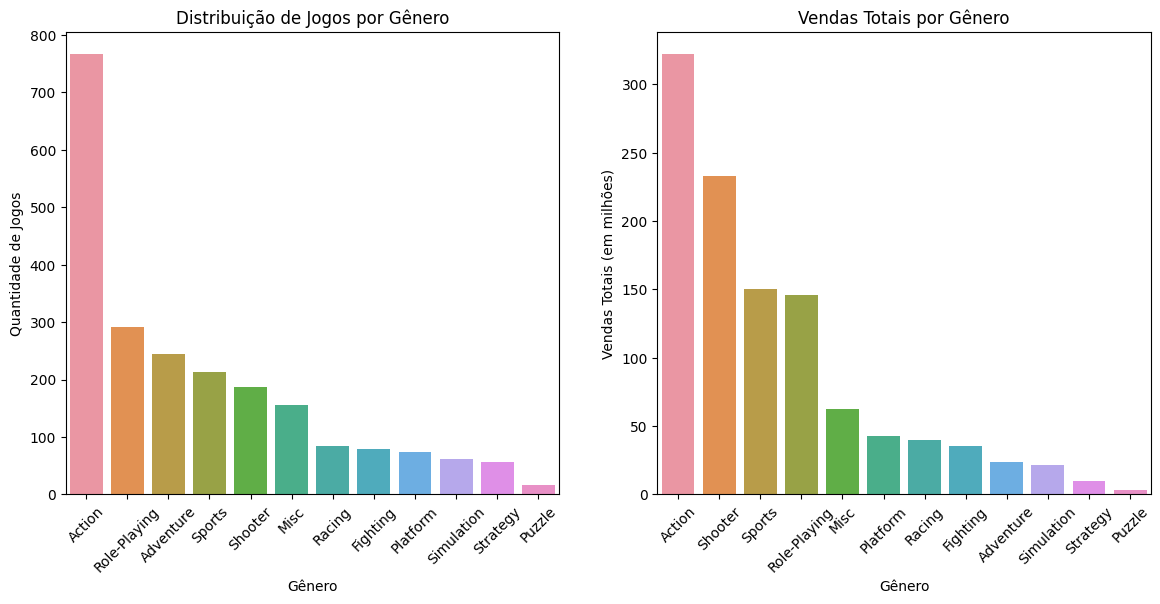

In [23]:
# Contar a quantidade de jogos por gêneroduas
count_by_genre = df_cut['genre'].value_counts()

# Calcular as vendas totais por gênero
sales_by_genre = df_cut.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(14, 6))

# Gráfico de barras para a contagem de jogos por gênero
plt.subplot(1, 2, 1)
sns.barplot(x=count_by_genre.index, y=count_by_genre.values)
plt.title('Distribuição de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Jogos')
plt.xticks(rotation=45)

# Gráfico de barras para as vendas totais por gênero
plt.subplot(1, 2, 2)
sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values)
plt.title('Vendas Totais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)

plt.show()

- Podemos generalizar que jogos de ação, shooter, esportes e role-playing são os mais rentáveis, e jogos de simulação, estratégia e puzzle são os que tem as vendas mais baixas.

## Criar um perfil de usuário para cada região

### As cinco plataformas principais

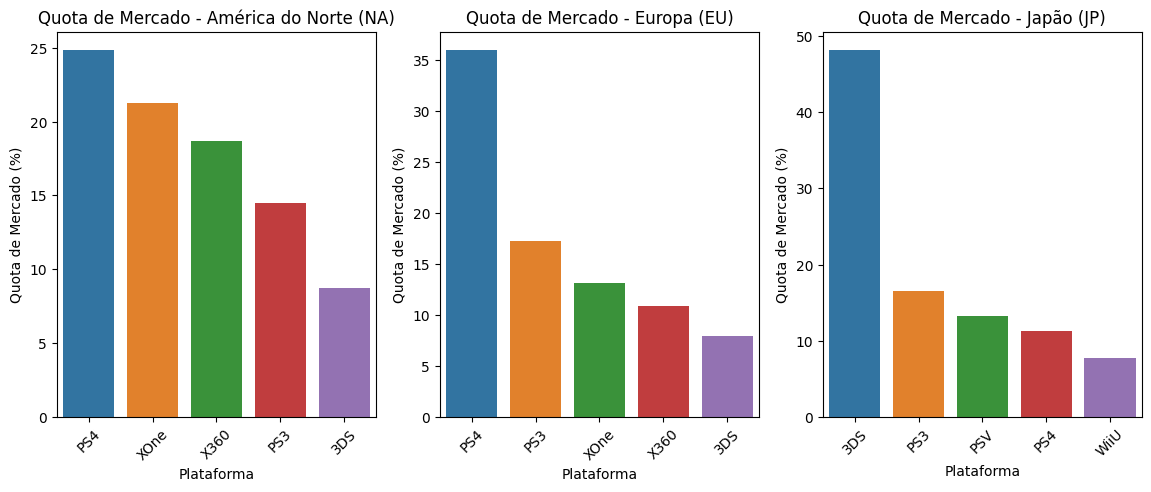

In [24]:
# Agrupar os dados por região e plataforma
sales_by_platform = df_cut.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Identificar as cinco principais plataformas em cada região
top_platform_na = sales_by_platform['na_sales'].nlargest(5)
top_platform_eu = sales_by_platform['eu_sales'].nlargest(5)
top_platform_jp = sales_by_platform['jp_sales'].nlargest(5)

# Calcular a quota de mercado de cada plataforma em cada região
quot_na = (top_platform_na / sales_by_platform['na_sales'].sum()) * 100
quot_eu = (top_platform_eu / sales_by_platform['eu_sales'].sum()) * 100
quot_jp = (top_platform_jp / sales_by_platform['jp_sales'].sum()) * 100

# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(14, 5))

# Gráficos de barras para as quotas de mercado
plt.subplot(1, 3, 1)
sns.barplot(x=quot_na.index, y=quot_na.values)
plt.title('Quota de Mercado - América do Norte (NA)')
plt.xlabel('Plataforma')
plt.ylabel('Quota de Mercado (%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=quot_eu.index, y=quot_eu.values)
plt.title('Quota de Mercado - Europa (EU)')
plt.xlabel('Plataforma')
plt.ylabel('Quota de Mercado (%)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=quot_jp.index, y=quot_jp.values)
plt.title('Quota de Mercado - Japão (JP)')
plt.xlabel('Plataforma')
plt.ylabel('Quota de Mercado (%)')
plt.xticks(rotation=45)

plt.show()

Em cada região temos diferentes plataformas que lideraram em vendas:
- Tendo um mercado mais variado na América do Norte com Xbox, Playstation e Nintendo bem distribuidos no top 5; 
- Na Europa as vendas de Playstation é mais predominante, seguidas por XBox.
- No Japão a principal plataforma é Nintendo 3ds, seguida por Playstation.

### Os cinco principais gêneros

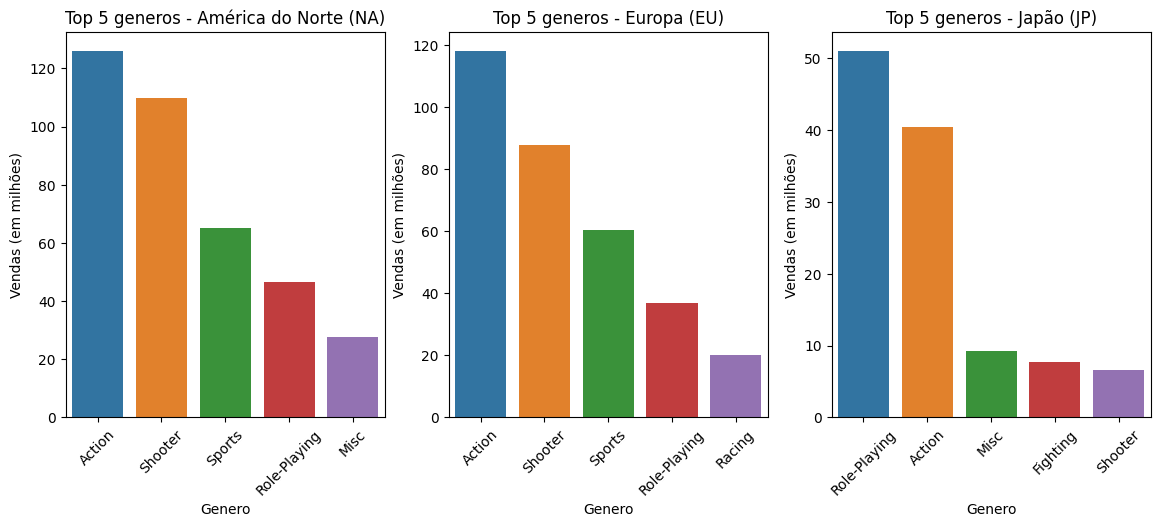

In [25]:
# Agrupar os dados por região e genero
sales_by_genre = df_cut.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Identificar os cinco principais generos em cada região
top_genre_na = sales_by_genre['na_sales'].nlargest(5)
top_genre_eu = sales_by_genre['eu_sales'].nlargest(5)
top_genre_jp = sales_by_genre['jp_sales'].nlargest(5)

# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(14, 5))

# Gráficos de barras para os top generos
plt.subplot(1, 3, 1)
sns.barplot(x=top_genre_na.index, y=top_genre_na.values)
plt.title('Top 5 generos - América do Norte (NA)')
plt.xlabel('Genero')
plt.ylabel('Vendas (em milhões)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=top_genre_eu.index, y=top_genre_eu.values)
plt.title('Top 5 generos - Europa (EU)')
plt.xlabel('Genero')
plt.ylabel('Vendas (em milhões)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=top_genre_jp.index, y=top_genre_jp.values)
plt.title('Top 5 generos - Japão (JP)')
plt.xlabel('Genero')
plt.ylabel('Vendas (em milhões)')
plt.xticks(rotation=45)

plt.show()

- Na América do norte e na Europa o mercado de jogos de Ação, Tiro, Esportes e role-playing são os mais populares, diferenciando apenas que na Europa temos uma venda maior em jogos de corrida onde na América jogos miscellaneous são mais rentáveis.
- Ja no Japão o genero mais popular é Role-Playing, seguido ação, miscellaneous, jogos de luta e de tiro, respectivamente.

### As classificações do ESRB afetam as vendas em regiões individuais?

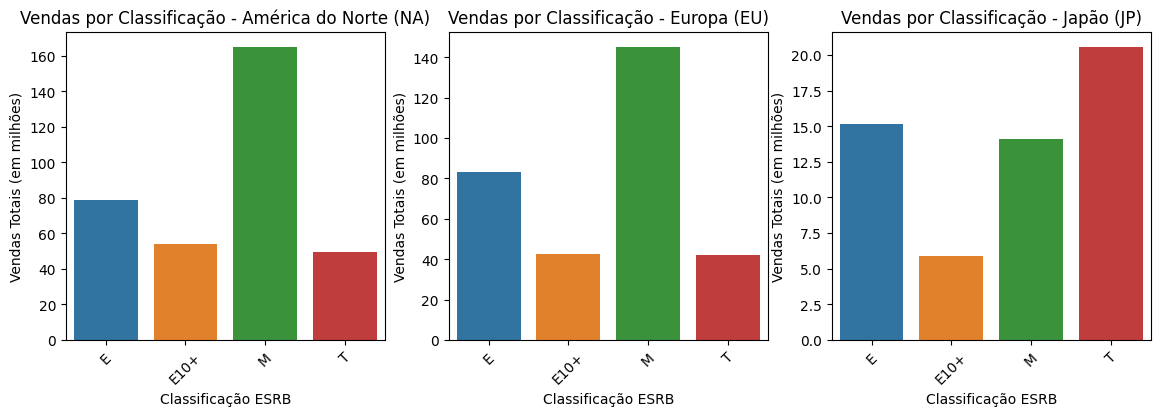

In [26]:
# Agrupar os dados por classificação ESRB e calcular as vendas totais por região
sales_by_rating = df_cut.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Preparar o tamanho da figura do gráfico
plt.figure(figsize=(14, 4))

# Gráficos de barras para as vendas por classificaçãoo
plt.subplot(1, 3, 1)
sns.barplot(x=sales_by_rating.index, y=sales_by_rating['na_sales'])
plt.title('Vendas por Classificação - América do Norte (NA)')
plt.xlabel('Classificação ESRB')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=sales_by_rating.index, y=sales_by_rating['eu_sales'])
plt.title('Vendas por Classificação - Europa (EU)')
plt.xlabel('Classificação ESRB')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=sales_by_rating.index, y=sales_by_rating['jp_sales'])
plt.title('Vendas por Classificação - Japão (JP)')
plt.xlabel('Classificação ESRB')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)

plt.show()

- Na America do Norte e Europa tem vendas mais altas nas classificações M, enquanto no Japão as vendas são mais concentradas em jogos de classificação T.

## Testar as hipóteses

### Teste de hipótese Xbox One - PC

Definição das Hipóteses
- Hipótese nula (H₀): As classificações médias dos usuários de Xbox One e PC são iguais.

- Hipótese alternativa (H₁): As classificações médias dos usuários de Xbox One e PC são diferentes.

In [37]:
# Filtrar os dados das duas plataformas
xbox_scores = df_cut[df_cut['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_cut[df_cut['platform'] == 'PC']['user_score'].dropna()

# Verificar as variâncias
print(xbox_scores.var()==pc_scores.var())

False


In [31]:
# Teste t para amostras independentes
results = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)

# Exibir os resultados
print('Valor-p:',results.pvalue)

alpha = 0.05

# Interpretar o resultado
if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipotese nula")

Valor-p: 0.14759594013430463
Não podemos rejeitar a hipotese nula


- Temos uma hipótese nula, o que significa que as classificações médias dos usuários de Xbox One e PC são estatiscamente iguais.

### Teste de hipótese Action - Sports

Definição dashipóteses:
- Hipótese nula (H₀): As classificações médias de usuários para os gêneros Action e Sports são iguais.

- Hipótese alternativa (H₁): As classificações médias de usuários para os gêneros Action e Sports são diferentes.

In [36]:
# Filtrar os dados das duas plataformas
action_scores = df_cut[df_cut['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_cut[df_cut['genre'] == 'Sports']['user_score'].dropna()

# Verificar as variâncias
print(action_scores.var()==sports_scores.var())

False


In [35]:
# Teste t para amostras independentes
results = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Exibir os resultados
print('Valor-p:',results.pvalue)

# Interpretar o resultado
if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipotese nula")

Valor-p: 1.4460039700704315e-20
Rejeitamos a hipótese nula


- Temos uma hipótese alternativa, ou seja, as classificações médias de usuários para os gêneros Action e Sports são diferentes.

- Formulei as hipóteses nulas e alternativas dos testes anteriores com base em se o valor p é maior que o valor de alpha, significando que se for menor é uma diferença estatísticamente pequena e temos a hipótese nula (as médias são iguais), com o mesmo se aplicando inversamente para hipótese alternativa.
- O nível de significância escolhido foi 5% (0.05), porque esse é um valor comumente usado para esse tipo de teste.

## Conclusão geral

Neste projeto, analisamos um conjunto de dados sobre jogos, passando por etapas essenciais como limpeza e tratamento de valores ausentes, conversão de tipos de dados e visualização das informações. Essas análises permitiram identificar padrões e tendências relevantes, contribuindo para uma melhor compreensão do mercado de games.